# Programming for Data Science and Artificial Intelligence

## Supervised Learning - Classification - Logistic Regression - Newton Raphson

### Readings: 
- [GERON] Ch4
- [VANDER] Ch5
- [HASTIE] Ch4

In [1]:
import numpy as np
import matplotlib.pyplot as plt

## Logistic Regression with Newton Raphson method

Newton Raphson method is an alternative way to gradient descent in Logistic Regression.  Instead of simply looking at each step on the slope, we take a second derivative to find the curvature towards the derivatives = 0.  It is typically faster than normal gradient descent, but as the number of features grow, its performance can hurt due to matrix inverse and finding second derivatives.

### Scratch

**Implementation steps:**
    
1. Prepare your data
    - add intercept
    - $X$ and $y$ and $w$ in the right shape
        - $X$ -> $(m, n)$
        - $y$ -> $(m,  )$
        - $w$ -> $(n,  )$
    - train-test split
    - feature scale
    - clean out any missing data
    - (optional) feature engineering
2. Predict and calculate the loss
    - The loss function is the cross entropy defined as
    $$J = - \Sigma_{i=1}^m y^{(i)}log(h) + (1-y^{(i)})log(1-h)$$
    where h is defined as the sigmoid function as
    $$h = \frac{1}{1+e^{-\theta^Tx}}$$
3. Calculate the direction based on the curvature of $\theta_j$ defined as
    $$curv(\theta_j) = H^{-1}(\theta_j) \nabla f(\theta_j) $$
    where $H^{-1}(\theta_j)$ of $f$ is a matrix of size (n, n) of second derivatives in which $H_{ij} = \frac{\partial^2f}{\partial w_i \partial w_j}$  and $\nabla f$ is the gradient of f, its vector of size (n, ) of partial derivatives $[\frac{\partial f}{\partial w_1}, \frac{\partial f}{\partial w_2},.... \frac{\partial f}{\partial w_p}]$
    - To make our program easy to implement, we can derive that 
        $$H = X^TSX$$
      where $S$ is a diagonal matrix of the first derivative, i.e., $h(1-h)$
4. Update the theta with this update rule
    $$\theta_j := \theta_j - curv$$
5. Loop 2-4 until max_iter is reached, or the difference between old loss and new loss are smaller than some predefined threshold tol

#### Step 1: Prepare your data

#### 1.1 Get your X and y in the right shape

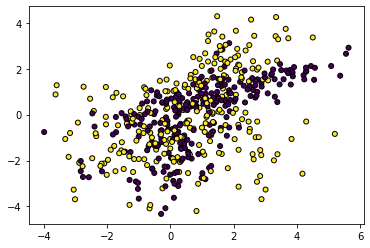

In [23]:
#generate quite a lot of noise
#with only 4 informative features out of 10
#with 2 redundant features, overlapping with that 4 informative features
#and 4 noisy features
#Also, make std wider using n_clusters=2
X, y = make_classification(n_samples=500, n_features=5, n_redundant=1, n_informative=4,
                             n_clusters_per_class=2, random_state=14)
plt.scatter(X[:, 0], X[:, 1], marker='o', c=y,
            s=25, edgecolor='k')

#### 1.2 Feature scale your data to reach faster convergence

In [24]:
#feature scaling helps improve reach convergence faster
scaler = StandardScaler()
X = scaler.fit_transform(X)

#### 1.3 Train test split your data

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

#### 1.4 Add intercepts

In [26]:
intercept = np.ones((X_train.shape[0], 1))
X_train   = np.concatenate((intercept, X_train), axis=1)  #add intercept
intercept = np.ones((X_test.shape[0], 1))
X_test    = np.concatenate((intercept, X_test), axis=1)  #add intercept

#### Step 2: Fit your algorithm 

#### 1. Define your algorithm

In [27]:
# here I use mini-batch as a demonstration
# you are free to use any variants of gradient descent
def newton(X, y, max_iter=1000):
    w = np.zeros(X.shape[1])
    l_rate = 0.01
    #10% of data
    batch_size = int(0.1 * X.shape[0])
    for i in range(max_iter):
        ix = np.random.randint(0, X.shape[0])
        batch_X = X[ix:ix+batch_size]
        batch_y = y[ix:ix+batch_size]
        cost, second, first = newton_curve(batch_X, batch_y, w)
        if i % 500 == 0:
            print(f"Cost at iteration {i}", cost)
        H_inverse = np.linalg.pinv(second)
        w = w - l_rate * H_inverse @ first
    return w, i

def newton_curve(X, y, w):
    m = X.shape[0]
    h = h_theta(X, w)
    error = h - y
    cost = -(np.sum(-y * np.log(h) - (1 - y) * np.log(1 - h)))
    first = (1/m) * np.dot(X.T, error)
    second = X.T @ np.diag((h) * (1-h)) @ X
    return cost, second, first

def sigmoid(x):
    return 1 / (1 + np.exp(-x))
        
def h_theta(X, w):
    return sigmoid(X @ w)

def output(pred):
    return np.round(pred)

w, i = newton(X_train, y_train, max_iter=5000)

Cost at iteration 0 -0.6931471805599452
Cost at iteration 500 -0.628399709969696
Cost at iteration 1000 -0.5429168730101
Cost at iteration 1500 -0.4788427495905634
Cost at iteration 2000 -0.47292285509564547
Cost at iteration 2500 -0.5436870160382086
Cost at iteration 3000 -0.4160014033835148
Cost at iteration 3500 -0.5210290756028056
Cost at iteration 4000 -0.5093314450002632
Cost at iteration 4500 -0.6158724620581006


#### 2. Compute accuracy

In [28]:
yhat = output(h_theta(X_test, w))
print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.7128245892951774
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.76      0.82      0.78        76
           1       0.79      0.73      0.76        74

    accuracy                           0.77       150
   macro avg       0.78      0.77      0.77       150
weighted avg       0.77      0.77      0.77       150



### Sklearn

In [29]:
model = LogisticRegression()  #set this to multiclass="ovr" to perform multinomial logistic

model.fit(X_train, y_train)
yhat = model.predict(X_test)

print("=========Average precision score=======")
print(average_precision_score(y_test, yhat))
print("=========Classification report=======")
print("Report: ", classification_report(y_test, yhat))

=========Average precision score=======
0.741981981981982
=========Classification report=======
Report:                precision    recall  f1-score   support

           0       0.81      0.80      0.81        76
           1       0.80      0.81      0.81        74

    accuracy                           0.81       150
   macro avg       0.81      0.81      0.81       150
weighted avg       0.81      0.81      0.81       150



### When to Use Logistic Regression

Almost always, as a baseline though!  Logistic Regression make an assumption based on linearity and as long as your data is approximately linear, Logistic Regression work fantastic.  There are also some clear advantages:
- They are quite fast for both training and prediction
- They have very few (if any) tunable parameters
- Descent algorithms works well with Logistic Regression

The only problem of Logistic Regression lies on its limitation of linearity.  I would usually try Naive Bayesian, followed by Logistic Regression as baseline.  And if the accuracy is quite low, I would try other non-linear classification models such as SVM or KNN or Decision Tree.